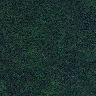

[4.9307942e-03 1.2014340e-05 1.1361213e-05 5.1899850e-03 1.1211932e-03
 9.9989164e-01 9.7341579e-10 2.4126475e-06 7.8850985e-04 4.5025349e-04
 1.1905926e-07 2.9447675e-04 1.0000000e+00 3.6109090e-03 2.6331842e-03
 6.4105880e-06 5.6911111e-03]
['clear', 'primary']


In [12]:
# make a prediction for a new image
from pandas import read_csv
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# create a mapping of tags to integers given the loaded mapping file
def create_tag_mapping(mapping_csv):
    # create a set of all known tags
    labels = set()
    for i in range(len(mapping_csv)):
        # convert spaced separated tags into an array of tags
        tags = mapping_csv['tags'][i].split(' ')
        # add tags to the set of known labels
        labels.update(tags)
    # convert set of labels to a list to list
    labels = list(labels)
    # order set alphabetically
    labels.sort()
    # dict that maps labels to integers, and the reverse
    labels_map = {labels[i]:i for i in range(len(labels))}
    inv_labels_map = {i:labels[i] for i in range(len(labels))}
    return labels_map, inv_labels_map

# convert a prediction to tags
def prediction_to_tags(inv_mapping, prediction):
    # round probabilities to {0, 1}
    values = prediction.round()
    # collect all predicted tags
    tags = [inv_mapping[i] for i in range(len(values)) if values[i] == 1.0]
    return tags

# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(96, 96))
    # display image
    display(img)
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 96, 96, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

# load an image and predict the class
def run_example(inv_mapping):
    # load the image
    img = load_image('Test/custom-jpg/3.JPG')
    # load model
    model = load_model('final_model.h5')
    # predict the class
    result = model.predict(img)
    print(result[0])
    # map prediction to tags
    tags = prediction_to_tags(inv_mapping, result[0])
    print(tags)

# load the mapping file
filename = 'train.csv'
mapping_csv = read_csv(filename)
# create a mapping of tags to integers
_, inv_mapping = create_tag_mapping(mapping_csv)
# entry point, run the example
run_example(inv_mapping)